In [22]:
import pandas as pd
import json

with open(r"D:\projectData\ScopusData2018-2023\mergednick.json", "r", encoding="utf-8") as f:
    data = json.load(f)


df = pd.json_normalize(data)

In [23]:
# Function to extract numeric "$" values
def extract_numeric_dollar(obj):
    numeric_values = []
    def recurse(o):
        if isinstance(o, dict):
            if "$" in o and o["$"].isdigit():
                numeric_values.append(o["$"])
            for v in o.values():
                recurse(v)
        elif isinstance(o, list):
            for item in o:
                recurse(item)
    recurse(obj)
    return numeric_values

# Apply to column
df['numeric_dollar'] = df['classification_code'].apply(extract_numeric_dollar)

print(df[['classification_code', 'numeric_dollar']])

                                     classification_code  \
0                                           [2700, MEDI]   
1      [[{'$': '2208'}, {'$': '2504'}], [{'classifica...   
2      [[{'classification-code': '522', 'classificati...   
3      [[{'classification-code': '641.1', 'classifica...   
4      [{'classification-code': '4', 'classification-...   
...                                                  ...   
20211  [[{'classification-code': '549.3', 'classifica...   
20212  [[{'classification-code': '461.6', 'classifica...   
20213                                       [3304, SOCI]   
20214  [{'classification-code': '73.9.4', 'classifica...   
20215  [[{'classification-code': '70.12.6', 'classifi...   

                       numeric_dollar  
0                                  []  
1                        [2208, 2504]  
2                  [1600, 1500, 2209]  
3      [1600, 3104, 3100, 3110, 2508]  
4            [1602, 1303, 2304, 1607]  
...                               ...  

In [24]:
import pandas as pd

def to_reference_df(ref_list):
    return pd.DataFrame(ref_list) if isinstance(ref_list, list) else None

df['references_df'] = df['references'].apply(to_reference_df)

In [25]:
df['dc_identifier'] = df['dc_identifier'].str.split(':').str[-1]

In [26]:
df

,title,abstract,author_keywords,author_counted,subject_area,subject_code,classification_type,classification_code,cited_by_count,description,...,publisher,issn,affiliation_countries,institution_name,citation_code,dc_identifier,prism_publicationName,references,numeric_dollar,references_df
0,Public health and international epidemiology f...,Not available,1,2,[Medicine (all)],[2700],"[ASJC, SUBJABBR]","[2700, MEDI]",1,,...,Springer International Publishing,,"[United States, Thailand]","[Stanford University School of Medicine, Chula...",ch,85077976956,"Radiology in Global Health: Strategies, Implem...",[{'ref_fulltext': 'Winslow CE. The untilled fi...,[],ref_f...
1,Flexible Printed Active Antenna for Digital Te...,"© 2018 The Institute of Electronics, Informati...",1,2,"[Electrical and Electronic Engineering, Electr...","[2208, 2504]","[ASJC, CPXCLASS, FLXCLASS, SUBJABBR]","[[{'$': '2208'}, {'$': '2504'}], [{'classifica...",1,This paper presents the development of a flexi...,...,Institute of Electrical and Electronics Engine...,15599450,[Thailand],[Chulalongkorn University],cp,85060936020,Progress in Electromagnetics Research Symposium,"[{'ref_fulltext': 'Pratumsiri, T. And P. Janpu...","[2208, 2504]",ref_fu...
2,Parametric study of hydrogen production via so...,© 2018 Elsevier LtdComputational fluid dynamic...,1,4,"[Chemistry (all), Chemical Engineering (all), ...","[1600, 1500, 2209]","[CPXCLASS, ENCOMPASSCLASS, FLXCLASS, ASJC, SUB...","[[{'classification-code': '522', 'classificati...",21,Computational fluid dynamics was applied for s...,...,Elsevier Ltd,00092509,[Thailand],[Chulalongkorn University],ar,85052201238,Chemical Engineering Science,"[{'ref_fulltext': 'Abanades, J.C., Anthony, E....","[1600, 1500, 2209]",ref_f...
3,Superhydrophobic coating from fluoroalkylsilan...,© 2018 Elsevier B.V. A superhydrophobic/supero...,1,8,"[Chemistry (all), Condensed Matter Physics, Ph...","[1600, 3104, 3100, 3110, 2508]","[CPXCLASS, FLXCLASS, ASJC, SUBJABBR]","[[{'classification-code': '641.1', 'classifica...",37,A superhydrophobic/superoleophilic mesh was su...,...,Elsevier B.V.,01694332,"[Japan, Thailand]","[Hirosaki University, Chulalongkorn University...",ar,85051498032,Applied Surface Science,"[{'ref_fulltext': 'Abadi, S.R.H., Sebzari, M.R...","[1600, 3104, 3100, 3110, 2508]",ref_f...
4,Electrochemical impedance-based DNA sensor usi...,© 2018 Elsevier B.V. A label-free electrochemi...,1,6,"[Analytical Chemistry, Biochemistry, Environme...","[1602, 1303, 2304, 1607]","[EMCLASS, ASJC, SUBJABBR]","[{'classification-code': '4', 'classification-...",68,A label-free electrochemical DNA sensor based ...,...,Elsevier B.V.,00032670,"[Thailand, United States]","[Chulalongkorn University, Thailand National E...",ar,85050678366,Analytica Chimica Acta,"[{'ref_fulltext': 'Davies, P.D.O., Pai, M., Th...","[1602, 1303, 2304, 1607]",ref_f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Long-chain bio-olefins production via oxidativ...,© 2021 Elsevier B.V.Long-chain α-olefins (≥ C1...,1,5,"[Catalysis, Chemistry (all)]","[1503, 1600]","[CPXCLASS, ENCOMPASSCLASS, FLXCLASS, ASJC, SUB...","[[{'classification-code': '549.3', 'classifica...",3,Long-chain α-olefins (≥ C10) are normally appl...,...,Elsevier B.V.,09205861,[Thailand],"[Chulalongkorn University, Center of Excellenc...",ar,85111945558,Catalysis Today,"[{'ref_fulltext': 'Zhao, D., Wang, X., Miller,...","[1503, 1600]",ref_f...
20212,Recent Developments and Applications of Microf...,"© 2021 Taylor & Francis Group, LLC.Nowadays, f...",1,3,[Analytical Chemistry],[1602],"[CPXCLASS, FLXCLASS, GEOCLASS, ASJC, SUBJABBR]","[[{'classification-code': '461.6', 'classifica...",11,"Nowadays, food safety has become a major conce...",...,Taylor and Francis Ltd.,10408347,[Thailand],[Chulalongkorn University],re,85111408415,Critical Reviews in Analytical Chemistry,[{'ref_fulltext': 'The Food and Agriculture Or...,[],ref_...
20213,"Social justice, education and peaceb

In [27]:
df.columns

Index(['title', 'abstract', 'author_keywords', 'author_counted',
       'subject_area', 'subject_code', 'classification_type',
       'classification_code', 'cited_by_count', 'description', 'document_type',
       'publication_year', 'publisher', 'issn', 'affiliation_countries',
       'institution_name', 'citation_code', 'dc_identifier',
       'prism_publicationName', 'references', 'numeric_dollar',
       'references_df'],
      dtype='object')

In [28]:
import numpy as np

df_test = df.drop(columns= ['references_df', 'classification_code', 'references'])
df_test.replace('', np.nan, inplace=True)

In [29]:
df_test.isnull().sum()

title                       1
abstract                    0
author_keywords             0
author_counted              0
subject_area                0
subject_code                0
classification_type         0
cited_by_count              4
description               665
document_type               0
publication_year            0
publisher                  11
issn                     6236
affiliation_countries       0
institution_name            0
citation_code               0
dc_identifier               0
prism_publicationName       0
numeric_dollar              0
dtype: int64

In [40]:
df_exploded = df_test.explode('subject_area')

# Now count unique subject areas per year
unique_areas_per_year = df_exploded.groupby('publication_year')['subject_area'].nunique().reset_index()
unique_areas_per_year.columns = ['publication_year', 'unique_subject_areas_count']

In [42]:
print(unique_areas_per_year.sort_values('publication_year'))

  publication_year  unique_subject_areas_count
0             2014                           1
1             2017                          11
2             2018                         293
3             2019                         294
4             2020                         304
5             2021                         308
6             2022                         310
7             2023                         302


In [47]:
# Convert publication_year from string to integer
df_test['publication_year'] = pd.to_numeric(df_test['publication_year'], errors='coerce')

# Now filter
df_filtered = df_test[df_test['publication_year'].between(2014, 2023)].copy()

if isinstance(df_filtered['subject_area'].iloc[0], str):
    import ast
    df_filtered['subject_area'] = df_filtered['subject_area'].apply(ast.literal_eval)

# Explode the lists into separate rows
df_exploded = df_filtered.explode('subject_area')

# Clean up whitespace
df_exploded['subject_area'] = df_exploded['subject_area'].str.strip()

# Now count each subject per year
subject_counts = df_exploded.groupby(['publication_year', 'subject_area']).size().reset_index(name='count')

# Sort for better readability
subject_counts = subject_counts.sort_values(['publication_year', 'count'], ascending=[True, False])

print("Count of Each Subject per Year (2018-2023):")
print("="*60)
for year in sorted(subject_counts['publication_year'].unique()):
    year_data = subject_counts[subject_counts['publication_year'] == year]
    print(f"\nYear {year}:")
    print("-" * 40)
    for _, row in year_data.head(10).iterrows():  # Show top 10 per year
        print(f"  {row['subject_area']}: {row['count']}")

Count of Each Subject per Year (2018-2023):

Year 2014:
----------------------------------------
  Medicine (all): 1

Year 2017:
----------------------------------------
  Computer Networks and Communications: 5
  Computer Science Applications: 5
  Hardware and Architecture: 3
  Safety, Risk, Reliability and Quality: 3
  Artificial Intelligence: 2
  Computer Vision and Pattern Recognition: 2
  Signal Processing: 2
  Infectious Diseases: 1
  Insect Science: 1
  Parasitology: 1

Year 2018:
----------------------------------------
  Materials Science (all): 169
  Chemistry (all): 137
  Nuclear and High Energy Physics: 115
  Chemical Engineering (all): 110
  Public Health, Environmental and Occupational Health: 101
  Condensed Matter Physics: 99
  Mechanical Engineering: 95
  Computer Networks and Communications: 94
  Mechanics of Materials: 93
  Veterinary (all): 93

Year 2019:
----------------------------------------
  Computer Networks and Communications: 160
  Materials Science (all): 


1. SUBJECT AREAS:
------------------------------
First value: ['Medicine (all)']
Type: <class 'list'>

Top 10 Individual Subjects:
1. Multidisciplinary: 1088 papers
2. Materials Science (all): 907 papers
3. Chemistry (all): 905 papers
4. Chemical Engineering (all): 755 papers
5. Infectious Diseases: 753 papers
6. Computer Science Applications: 725 papers
7. Electrical and Electronic Engineering: 705 papers
8. Computer Networks and Communications: 699 papers
9. Medicine (all): 680 papers
10. Public Health, Environmental and Occupational Health: 664 papers

Total unique subjects: 321


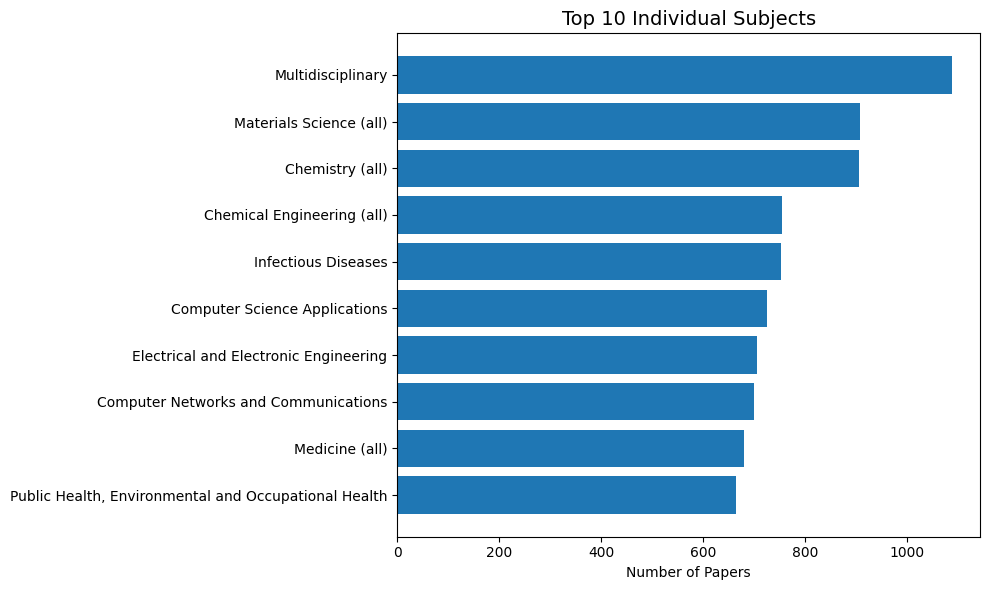

In [68]:
import matplotlib.pyplot as plt
# SUBJECT AREA - Handle lists
if 'subject_area' in df_test.columns:
    print("\n1. SUBJECT AREAS:")
    print("-"*30)
    
    # Check if it's lists
    sample = df_test['subject_area'].iloc[0]
    print(f"First value: {sample}")
    print(f"Type: {type(sample)}")
    
    # If it's lists, we need to explode them
    if isinstance(sample, list) or (isinstance(sample, str) and '[' in sample):
        
        # If string that looks like list, convert
        if isinstance(sample, str):
            import ast
            df_test['subject_area'] = df_test['subject_area'].apply(ast.literal_eval)
        
        # Explode lists into separate rows
        df_exploded = df_test.explode('subject_area')
        
        # Clean up
        df_exploded['subject_area'] = df_exploded['subject_area'].str.strip()
        
        # Count unique subjects
        area_counts = df_exploded['subject_area'].value_counts()
        total_unique = df_exploded['subject_area'].nunique()
        
        print(f"\nTop 10 Individual Subjects:")
        for i, (area, count) in enumerate(area_counts.head(10).items(), 1):
            print(f"{i}. {area}: {count} papers")
        
        print(f"\nTotal unique subjects: {total_unique}")
        
        # Show chart
        plt.figure(figsize=(10, 6))
        top_10 = area_counts.head(10)
        plt.barh(range(len(top_10)), top_10.values)
        plt.yticks(range(len(top_10)), top_10.index)
        plt.gca().invert_yaxis()
        plt.title('Top 10 Individual Subjects', fontsize=14)
        plt.xlabel('Number of Papers')
        plt.tight_layout()
        plt.show()
    
    # If it's already single values (not lists)
    else:
        area_counts = df_test['subject_area'].value_counts()
        print(f"\nTop 10 Subject Areas:")
        for i, (area, count) in enumerate(area_counts.head(10).items(), 1):
            print(f"{i}. {area}: {count} papers")
        print(f"\nTotal unique subject areas: {df_test['subject_area'].nunique()}")

TOP PUBLISHERS:

Total unique publishers: 1107

Top 10 Publishers:
1. Elsevier Ltd: 1640 papers
2. Elsevier B.V.: 1518 papers
3. MDPI: 880 papers
4. Institute of Electrical and Electronics Engineers Inc.: 814 papers
5. John Wiley and Sons Inc: 615 papers
6. Springer Science and Business Media Deutschland GmbH: 502 papers
7. Springer: 500 papers
8. Nature Research: 447 papers
9. Taylor and Francis Ltd.: 400 papers
10. Elsevier Inc.: 383 papers

TOP PUBLICATION NAMES (JOURNALS):

Total unique publications: 5501

Top 10 Publication Names:
1. Scientific Reports: 438 papers
2. PLoS ONE: 254 papers
3. Journal of High Energy Physics: 235 papers
4. Journal of the Medical Association of Thailand: 201 papers
5. Engineering Journal: 182 papers
6. ACM International Conference Proceeding Series: 144 papers
7. European Physical Journal C: 129 papers
8. Thai Journal of Veterinary Medicine: 119 papers
9. Journal of Physics: Conference Series: 111 papers
10. Physics Letters, Section B: Nuclear, Element

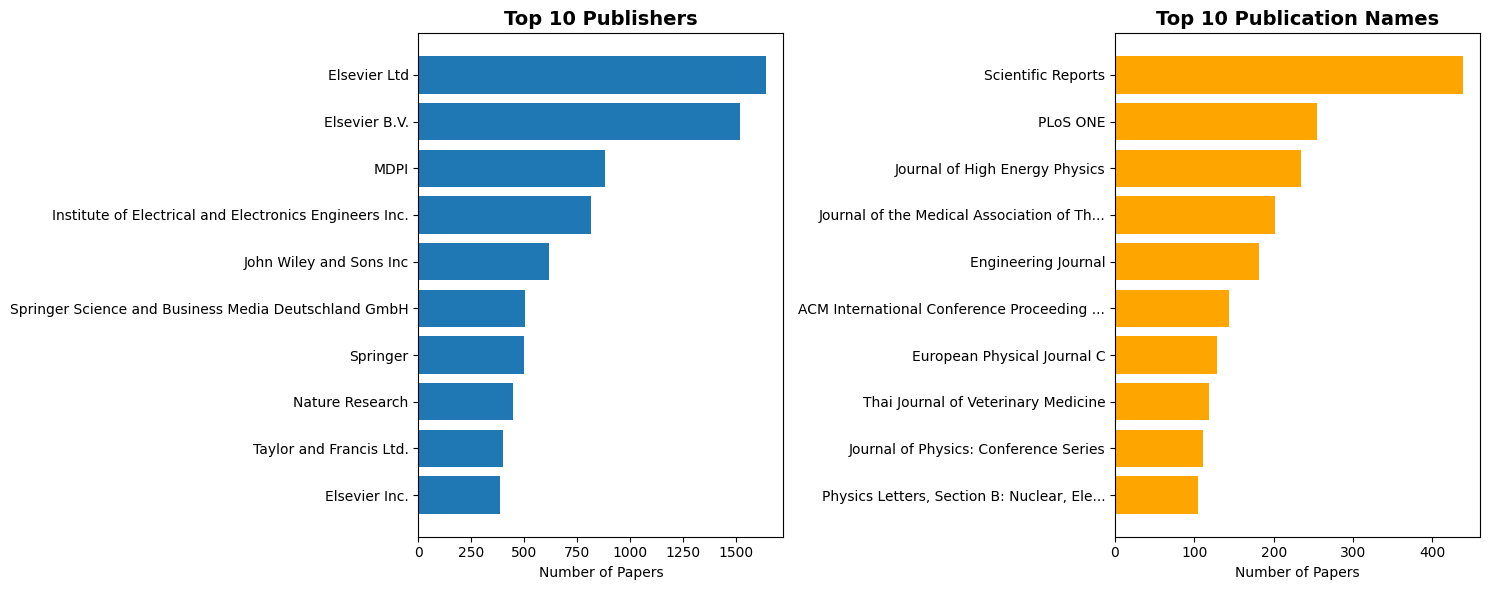


QUICK STATISTICS:
Total papers analyzed: 20216
Most common publisher: Elsevier Ltd (1640 papers)
Most common journal: Scientific Reports (438 papers)
Publisher diversity: 1107 unique publishers
Journal diversity: 5501 unique publication names


In [51]:
# 1. TOP PUBLISHERS
print("TOP PUBLISHERS:")
print("="*50)

publisher_counts = df_test['publisher'].value_counts()
print(f"\nTotal unique publishers: {len(publisher_counts)}")
print("\nTop 10 Publishers:")
for i, (publisher, count) in enumerate(publisher_counts.head(10).items(), 1):
    print(f"{i}. {publisher}: {count} papers")

# 2. TOP PUBLICATION NAMES (JOURNALS)
print("\n" + "="*50)
print("TOP PUBLICATION NAMES (JOURNALS):")
print("="*50)

journal_counts = df_test['prism_publicationName'].value_counts()
print(f"\nTotal unique publications: {len(journal_counts)}")
print("\nTop 10 Publication Names:")
for i, (journal, count) in enumerate(journal_counts.head(10).items(), 1):
    print(f"{i}. {journal}: {count} papers")

# 3. SIMPLE BAR CHARTS
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot top 10 publishers
top_publishers = publisher_counts.head(10)
ax1.barh(range(len(top_publishers)), top_publishers.values)
ax1.set_yticks(range(len(top_publishers)))
ax1.set_yticklabels(top_publishers.index)
ax1.invert_yaxis()  # Highest at top
ax1.set_title('Top 10 Publishers', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Papers')

# Plot top 10 journals
top_journals = journal_counts.head(10)
ax2.barh(range(len(top_journals)), top_journals.values, color='orange')
ax2.set_yticks(range(len(top_journals)))
ax2.set_yticklabels([j[:40] + '...' if len(j) > 40 else j for j in top_journals.index])
ax2.invert_yaxis()
ax2.set_title('Top 10 Publication Names', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Papers')

plt.tight_layout()
plt.show()

# 4. QUICK STATS
print("\n" + "="*50)
print("QUICK STATISTICS:")
print("="*50)
print(f"Total papers analyzed: {len(df_test)}")
print(f"Most common publisher: {publisher_counts.index[0]} ({publisher_counts.iloc[0]} papers)")
print(f"Most common journal: {journal_counts.index[0]} ({journal_counts.iloc[0]} papers)")
print(f"Publisher diversity: {len(publisher_counts)} unique publishers")
print(f"Journal diversity: {len(journal_counts)} unique publication names")

AUTHORS & AFFILIATIONS ANALYSIS

1. AUTHOR COUNT PER PAPER:
----------------------------------------
Average authors per paper: 66.9
Max authors on a paper: 5241
Min authors on a paper: 1

Author Count Distribution:
1 authors: 691 papers
2 authors: 2869 papers
3 authors: 3059 papers
4 authors: 3009 papers
5 authors: 2317 papers
6 authors: 2004 papers
7 authors: 1530 papers
8 authors: 1083 papers
9 authors: 686 papers
10 authors: 561 papers

2. TOP INSTITUTIONS:
----------------------------------------
1. ['Chulalongkorn University']: 4225 papers
2. ['Faculty of Medicine, Chulalongkorn University']: 201 papers
3. ['Chulalongkorn University', 'King Chulalongkorn Memorial Hospital']: 201 papers
4. ['Chulalongkorn University', 'Mahidol University']: 190 papers
5. ['Chulalongkorn University', 'Faculty of Medicine, Chulalongkorn University']: 108 papers
6. ['Chulalongkorn University', 'Thammasat University']: 100 papers
7. ['Chulalongkorn University', 'Kasetsart University']: 90 papers
8. ['

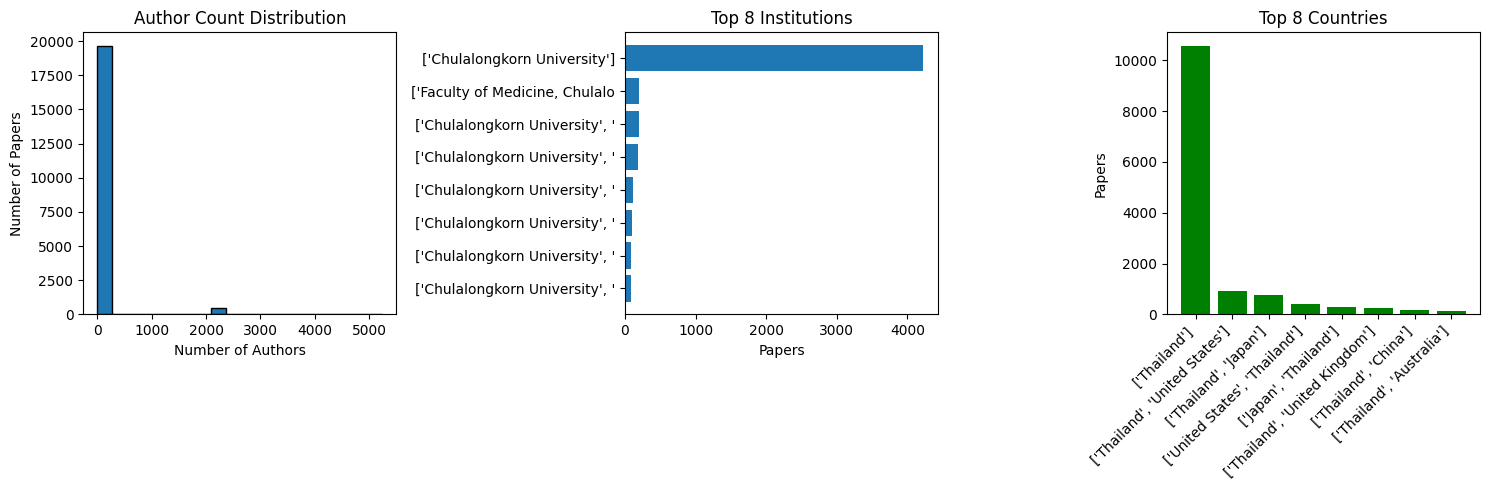


COLLABORATION PATTERNS:
Single-author papers: 691 (3.4%)
Small team (2-5 authors): 11254 (55.7%)
Large team (>5 authors): 8271 (40.9%)


In [69]:
print("AUTHORS & AFFILIATIONS ANALYSIS")
print("="*60)

# 1. AUTHOR COUNT
if 'author_counted' in df_test.columns:
    print("\n1. AUTHOR COUNT PER PAPER:")
    print("-"*40)
    
    # Basic stats
    print(f"Average authors per paper: {df_test['author_counted'].mean():.1f}")
    print(f"Max authors on a paper: {df_test['author_counted'].max()}")
    print(f"Min authors on a paper: {df_test['author_counted'].min()}")
    
    # Distribution
    print("\nAuthor Count Distribution:")
    author_counts = df_test['author_counted'].value_counts().sort_index()
    for count, num_papers in author_counts.head(10).items():
        print(f"{count} authors: {num_papers} papers")

# 2. INSTITUTIONS
if 'institution_name' in df_test.columns:
    print("\n2. TOP INSTITUTIONS:")
    print("-"*40)
    
    institution_counts = df_test['institution_name'].value_counts().head(10)
    for i, (institution, count) in enumerate(institution_counts.items(), 1):
        print(f"{i}. {institution}: {count} papers")

# 3. COUNTRIES
if 'affiliation_countries' in df_test.columns:
    print("\n3. TOP COUNTRIES:")
    print("-"*40)
    
    country_counts = df_test['affiliation_countries'].value_counts().head(10)
    for i, (country, count) in enumerate(country_counts.items(), 1):
        print(f"{i}. {country}: {count} papers")

# 4. SIMPLE VISUALIZATION
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Author count distribution
if 'author_counted' in df_test.columns:
    axes[0].hist(df_test['author_counted'], bins=20, edgecolor='black')
    axes[0].set_title('Author Count Distribution')
    axes[0].set_xlabel('Number of Authors')
    axes[0].set_ylabel('Number of Papers')

# Top institutions
if 'institution_name' in df_test.columns:
    top_inst = df_test['institution_name'].value_counts().head(8)
    axes[1].barh(range(len(top_inst)), top_inst.values)
    axes[1].set_yticks(range(len(top_inst)))
    axes[1].set_yticklabels([str(x)[:30] for x in top_inst.index])
    axes[1].invert_yaxis()
    axes[1].set_title('Top 8 Institutions')
    axes[1].set_xlabel('Papers')

# Top countries
if 'affiliation_countries' in df_test.columns:
    top_countries = df_test['affiliation_countries'].value_counts().head(8)
    axes[2].bar(range(len(top_countries)), top_countries.values, color='green')
    axes[2].set_xticks(range(len(top_countries)))
    axes[2].set_xticklabels(top_countries.index, rotation=45, ha='right')
    axes[2].set_title('Top 8 Countries')
    axes[2].set_ylabel('Papers')

plt.tight_layout()
plt.show()

# 5. COLLABORATION PATTERN (SIMPLE)
print("\n" + "="*60)
print("COLLABORATION PATTERNS:")
print("="*60)

if 'author_counted' in df_test.columns:
    # Categorize by number of authors
    single_author = len(df_test[df_test['author_counted'] == 1])
    small_team = len(df_test[(df_test['author_counted'] >= 2) & (df_test['author_counted'] <= 5)])
    large_team = len(df_test[df_test['author_counted'] > 5])
    
    print(f"Single-author papers: {single_author} ({single_author/len(df_test)*100:.1f}%)")
    print(f"Small team (2-5 authors): {small_team} ({small_team/len(df_test)*100:.1f}%)")
    print(f"Large team (>5 authors): {large_team} ({large_team/len(df_test)*100:.1f}%)")